<a href="https://colab.research.google.com/github/chingyaousf/Intern-project-2023/blob/main/scripts/MLpredictionDep_04_Model_NNW_MYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DeepDEP/filtered_arranged_table.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,ZYG11A (440590) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZEF1 (23140) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,3.282440,2.797013,6.821455,3.010780,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.014355,2.032101,7.002252,3.444932,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.014355,2.761285,6.826421,3.524816,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.014355,1.989139,6.332708,3.673556,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,1.356144,2.956057,7.853185,3.442280,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.014355,4.173127,6.560256,2.969012,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.622930,3.084064,6.596935,3.177918,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,1.400538,2.568032,6.953498,3.087463,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,1.480265,2.748461,7.432041,2.903038,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/MYC_gt_00.csv")
data

,DepMap_ID,A1CF (29974) Exp,A2ML1 (144568) Exp,AAAS (8086) Exp,AADAC (13) Exp,AADACL2 (344752) Exp,AARS1 (16) Exp,AARSD1 (80755) Exp,AATF (26574) Exp,ABCA10 (10349) Exp,...,ZSCAN10 (84891) Exp,ZSCAN4 (201516) Exp,ZSCAN5A (79149) Exp,ZSWIM1 (90204) Exp,ZXDC (79364) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.056584,0.111031,5.700440,0.790772,0.014355,5.648178,4.772414,5.391287,0.137504,...,0.000000,0.000000,2.653060,3.276497,4.700994,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.000000,0.344828,6.336819,0.000000,0.000000,8.113221,6.458119,6.364572,0.000000,...,0.137504,0.014355,2.941106,2.691534,3.619413,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.014355,0.014355,6.337176,0.000000,0.000000,7.435795,6.105594,6.668034,0.137504,...,0.014355,0.042644,3.089159,2.531069,3.763412,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,1.405992,0.000000,5.431289,3.547203,0.014355,5.290572,5.467606,5.649615,0.422233,...,0.070389,0.545968,2.675816,2.518535,3.872829,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,3.586164,0.000000,5.674122,1.985500,0.000000,7.669523,5.499527,6.182295,0.000000,...,0.137504,0.000000,2.563158,3.536053,3.773996,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,0.000000,5.300490,0.042644,0.000000,6.572283,5.557655,5.666473,0.189034,...,0.000000,0.014355,2.985500,2.182692,2.918386,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.000000,0.321928,5.831877,1.443607,0.000000,7.119460,4.785551,4.644433,0.985500,...,0.111031,0.028569,2.523562,2.976364,2.639232,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.014355,0.201634,5.646451,0.000000,0.000000,6.986183,6.202418,5.441616,1.150560,...,0.000000,0.000000,2.829850,2.981853,2.904966,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.000000,0.014355,5.104337,0.000000,0.000000,6.690696,5.094236,5.371559,0.150560,...,0.000000,1.575312,1.201634,2.121015,2.845992,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/MYC_gt_01.csv")
data

,DepMap_ID,ABCA7 (10347) Exp,ABCB11 (8647) Exp,ABHD14B (84836) Exp,ABHD3 (171586) Exp,ABI1 (10006) Exp,ABRA (137735) Exp,ACAA1 (30) Exp,ACSF3 (197322) Exp,ACSL5 (51703) Exp,...,ZNF296 (162979) Exp,ZNF341 (84905) Exp,ZNF706 (51123) Exp,ZP3 (7784) Exp,ZPBP2 (124626) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,2.121015,0.014355,4.179511,3.021480,3.787641,0.028569,5.439956,3.542258,0.226509,...,0.748461,1.895303,6.191405,1.867896,0.000000,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,4.883132,0.275007,6.203397,2.682573,4.689299,0.000000,4.457463,4.875289,4.942984,...,4.012569,2.150560,6.282996,2.910733,0.000000,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,3.475085,0.189034,5.788686,3.754888,5.242603,0.056584,4.144046,4.606442,5.008989,...,3.072106,2.223423,6.970624,1.859970,0.189034,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,3.898208,0.014355,6.371907,4.418865,4.493775,0.014355,5.983450,3.868884,6.969012,...,2.090853,1.655352,5.641835,3.053111,0.000000,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,3.351911,0.000000,5.212180,4.241840,5.785289,0.000000,6.383877,4.201634,4.430954,...,2.094236,1.769772,6.298658,1.867896,0.000000,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.280956,0.000000,4.470537,4.308885,5.372256,0.000000,3.909773,3.478972,2.277985,...,0.000000,0.765535,6.785551,2.419539,0.000000,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,2.620586,0.014355,4.651339,2.353323,4.463361,0.000000,5.395406,3.229588,1.201634,...,0.176323,1.063503,5.784504,2.933573,0.028569,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,2.523562,0.000000,4.570463,3.612352,4.459432,0.000000,5.169123,3.935460,1.599318,...,0.422233,1.097611,5.563158,3.189034,0.000000,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,2.794936,0.000000,5.132577,3.428946,4.736064,0.014355,5.360013,2.341986,1.769772,...,0.344828,0.887525,7.288912,4.248687,0.000000,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/MYC_ng_01.csv")
data

,DepMap_ID,A4GNT (51146) Exp,AADAT (51166) Exp,AAGAB (79719) Exp,AAK1 (22848) Exp,AAMDC (28971) Exp,AAR2 (25980) Exp,ABCA3 (21) Exp,ABCB6 (10058) Exp,ABCC9 (10060) Exp,...,ZSWIM8 (23053) Exp,ZXDB (158586) Exp,ZYG11B (79699) Exp,ZYX (7791) Exp,ZZZ3 (26009) Exp,EIF2AK3 (9451) Dep,MYC (4609) Dep,NQO1 (1728) Dep,SF3B1 (23451) Dep,SQSTM1 (8878) Dep
0,ACH-000001,0.176323,3.415488,5.752213,3.078951,7.923149,5.096768,1.646163,4.811985,0.014355,...,5.663345,1.914565,2.797013,6.821455,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.000000,0.042644,4.416164,2.292782,3.884598,5.209843,1.350497,4.973152,0.422233,...,4.969012,1.622930,2.032101,7.002252,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.000000,0.000000,4.791293,2.625270,3.663345,5.793896,1.933573,5.231509,0.765535,...,4.448901,1.773996,2.761285,6.826421,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,2.629939,5.053546,1.970854,3.915521,3.957915,0.400538,3.392317,0.014355,...,4.743623,1.761285,1.989139,6.332708,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,2.684819,5.246028,3.397803,7.032211,5.878480,3.419539,5.590662,5.248307,...,5.383013,2.176323,2.956057,7.853185,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,2.356144,6.511278,3.819668,5.254367,4.983222,2.017922,3.730096,0.028569,...,4.686501,2.817623,4.173127,6.560256,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.000000,1.843984,5.974759,4.034744,6.596041,5.234578,2.459432,2.805292,3.829850,...,5.363522,2.634593,3.084064,6.596935,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.028569,2.748461,5.193378,4.133399,5.602588,4.958379,0.042644,3.226509,0.765535,...,5.765800,3.224966,2.568032,6.953498,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.000000,2.565597,5.491532,3.396434,9.623186,4.072106,0.526069,3.379898,1.589763,...,6.049413,1.867896,2.748461,7.432041,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,A4GNT_51146_Exp,AADAT_51166_Exp,AAGAB_79719_Exp,AAK1_22848_Exp,AAMDC_28971_Exp,AAR2_25980_Exp,ABCA3_21_Exp,ABCB6_10058_Exp,ABCC9_10060_Exp,...,ZSWIM8_23053_Exp,ZXDB_158586_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZZ3_26009_Exp,EIF2AK3_9451_Dep,MYC_4609_Dep,NQO1_1728_Dep,SF3B1_23451_Dep,SQSTM1_8878_Dep
0,ACH-000001,0.176323,3.415488,5.752213,3.078951,7.923149,5.096768,1.646163,4.811985,0.014355,...,5.663345,1.914565,2.797013,6.821455,4.381975,0.018546,0.807414,0.076613,1.000000,0.020657
1,ACH-000004,0.000000,0.042644,4.416164,2.292782,3.884598,5.209843,1.350497,4.973152,0.422233,...,4.969012,1.622930,2.032101,7.002252,4.910733,0.044907,0.999985,0.061617,1.000000,0.049385
2,ACH-000005,0.000000,0.000000,4.791293,2.625270,3.663345,5.793896,1.933573,5.231509,0.765535,...,4.448901,1.773996,2.761285,6.826421,5.592457,0.009301,1.000000,0.049535,0.994004,0.015969
3,ACH-000007,0.000000,2.629939,5.053546,1.970854,3.915521,3.957915,0.400538,3.392317,0.014355,...,4.743623,1.761285,1.989139,6.332708,3.469886,0.058868,0.999620,0.036902,0.999886,0.041706
4,ACH-000009,0.000000,2.684819,5.246028,3.397803,7.032211,5.878480,3.419539,5.590662,5.248307,...,5.383013,2.176323,2.956057,7.853185,3.351911,0.040590,0.979828,0.006602,0.973598,0.034535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,0.000000,2.356144,6.511278,3.819668,5.254367,4.983222,2.017922,3.730096,0.028569,...,4.686501,2.817623,4.173127,6.560256,5.276869,0.038095,0.701928,0.161286,1.000000,0.136197
1001,ACH-002800,0.000000,1.843984,5.974759,4.034744,6.596041,5.234578,2.459432,2.805292,3.829850,...,5.363522,2.634593,3.084064,6.596935,4.847997,0.177952,0.462993,0.054260,1.000000,0.022899
1002,ACH-002834,0.028569,2.748461,5.193378,4.133399,5.602588,4.958379,0.042644,3.226509,0.765535,...,5.765800,3.224966,2.568032,6.953498,4.226509,0.002074,0.911326,0.022301,0.998623,0.013754
1003,ACH-002847,0.000000,2.565597,5.491532,3.396434,9.623186,4.072106,0.526069,3.379898,1.589763,...,6.049413,1.867896,2.748461,7.432041,4.660495,0.161273,0.704900,0.184386,0.999903,0.058351


In [ ]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["MYC_4609_Dep"]]

targets

,MYC_4609_Dep
0,0.807414
1,0.999985
2,1.000000
3,0.999620
4,0.979828
...,...
1000,0.701928
1001,0.462993
1002,0.911326
1003,0.704900


In [ ]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#2 Create and train the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(64, activation='relu'))  # Additional layer
# model.add(Dense(64, activation='relu'))  # Additional layer
model.add(Dense(targets.shape[1]))  # Number of output neurons should match the number of target columns

model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32)
model.fit(X_train_scaled, y_train, epochs=900, batch_size=32)

Epoch 1/900
26/26 [==============================] - 1s 6ms/step - loss: 0.2211
Epoch 2/900
26/26 [==============================] - 0s 7ms/step - loss: 0.0643
Epoch 3/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0301
Epoch 4/900
26/26 [==============================] - 0s 7ms/step - loss: 0.0236
Epoch 5/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 6/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 7/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 8/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 9/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 10/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 11/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 12/900
26/26 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 13/900
26/26 [=================

In [ ]:
# Make predictions
y_pred = model.predict(X_test_scaled)


7/7 [==============================] - 0s 2ms/step


In [ ]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [[0.9894122 ]
 [0.9770318 ]
 [0.9430271 ]
 [0.9556347 ]
 [0.9784288 ]
 [0.9846256 ]
 [0.9459845 ]
 [0.94721663]
 [0.9862815 ]
 [0.89987236]
 [0.67365277]
 [0.99460745]
 [0.9742723 ]
 [0.9855225 ]
 [0.97549546]
 [0.9421598 ]
 [0.663468  ]
 [0.84954154]
 [0.99700403]
 [1.0015426 ]
 [1.0009518 ]
 [1.0011475 ]
 [0.9669111 ]
 [0.97202516]
 [0.9731492 ]
 [0.9733193 ]
 [1.0022976 ]
 [0.8934119 ]
 [1.0010628 ]
 [0.9925607 ]
 [0.95243394]
 [0.9682461 ]
 [1.0023375 ]
 [0.9892348 ]
 [0.9785193 ]
 [0.94479024]
 [0.96351016]
 [0.30907738]
 [1.001228  ]
 [0.9836526 ]
 [0.980082  ]
 [0.92500657]
 [1.0018775 ]
 [1.000505  ]
 [0.8405876 ]
 [0.9997978 ]
 [0.9203366 ]
 [1.0000175 ]
 [0.9834713 ]
 [0.46687728]
 [1.001045  ]
 [1.0003501 ]
 [0.9742477 ]
 [0.96306   ]
 [0.95188814]
 [0.98790973]
 [1.001853  ]
 [0.9954729 ]
 [0.9939177 ]
 [1.0001642 ]
 [0.9973035 ]
 [1.0017521 ]
 [0.99649465]
 [0.3135249 ]
 [0.99932754]
 [1.0023091 ]
 [0.27682033]
 [1.0022657 ]
 [1.0002688 ]
 [0.9936117 ]
 [

In [ ]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.017635413957850656


In [ ]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.058011685544988784


In [ ]:
# Calculate R-squared (coefficient of determination)

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Coefficient of Determination (R-squared): 0.19575176647863535


In [ ]:
# MYC_filtered_arranged_table.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)


Mean Squared Error: 0.021556991191388184
Mean Absolute Error: 0.06269302401000935
Coefficient of Determination (R-squared): 0.016911532264221263


In [ ]:
# MYC_gt_00.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.022505575989861963
Mean Absolute Error: 0.06414776355739818
Coefficient of Determination (R-squared): -0.026347880321222483


In [ ]:
# MYC_gt_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.016779676793278027
Mean Absolute Error: 0.0603292874073389
Coefficient of Determination (R-squared): 0.23477694074508604


In [ ]:
# MYC_ng_01.csv

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r2 = r2_score(y_test, y_pred)
print('Coefficient of Determination (R-squared):', r2)

Mean Squared Error: 0.017635413957850656
Mean Absolute Error: 0.058011685544988784
Coefficient of Determination (R-squared): 0.19575176647863535


In [ ]:
# MYC_filtered_arranged_table.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "MYC_4609_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_filtered_arranged_table.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_MYC_4609_Dep,MYC_4609_Dep
926,ACH-001858,0.176323,0.056584,0.097611,0.014355,0.000000,3.035624,0.056584,5.299758,4.263034,...,0.992768,2.451541,2.889474,0.815575,2.976364,7.199967,3.465974,4.780310,0.978124,0.986031
630,ACH-000962,4.410748,0.028569,0.056584,0.000000,0.028569,1.189034,0.014355,5.620000,4.238023,...,1.599318,2.538538,3.364572,2.307429,2.980025,6.212569,3.214125,3.919340,0.967392,0.808635
682,ACH-001164,4.262283,0.000000,5.371210,0.000000,0.000000,1.765535,0.000000,5.003152,3.489286,...,0.495695,1.244887,2.711495,0.333424,2.495695,4.735522,2.107688,3.363171,0.982083,0.999965
514,ACH-000799,4.440288,0.014355,6.867773,0.014355,0.163499,0.641546,0.124328,5.484460,4.268285,...,0.807355,1.475085,4.251719,0.475085,2.077243,7.966477,4.179511,3.481557,0.966917,0.973706
365,ACH-000571,5.489928,0.000000,0.678072,0.000000,0.042644,3.016140,0.214125,5.319040,4.609400,...,0.516015,1.918386,3.526069,0.000000,3.114367,6.934281,4.079805,4.527946,0.982056,0.947456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.111031,0.014355,0.028569,0.000000,0.000000,1.378512,0.028569,5.497612,3.605257,...,0.505891,1.769772,3.135863,2.319040,2.367371,7.258236,2.841973,4.584361,0.981587,0.981174
778,ACH-001454,0.400538,0.000000,0.189034,0.163499,0.000000,4.678072,0.000000,4.751678,4.521051,...,1.104337,1.847997,2.754888,1.220330,2.459432,5.038261,2.782409,2.657640,0.935985,0.851388
334,ACH-000522,4.157044,0.000000,0.214125,0.000000,0.000000,2.893362,0.014355,6.321026,3.298658,...,0.823749,1.879706,3.442280,2.761285,3.238787,7.097295,4.590362,4.649041,0.984019,0.999722
210,ACH-000343,4.189034,0.042644,0.014355,0.367371,0.000000,2.304511,0.097611,5.744699,4.082362,...,5.763943,5.212180,3.607626,3.411426,3.869871,3.674687,2.611172,4.669027,0.973460,0.971561


In [ ]:
# MYC_gt_00.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "MYC_4609_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_gt_00.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1CF_29974_Exp,A2ML1_144568_Exp,AAAS_8086_Exp,AADAC_13_Exp,AADACL2_344752_Exp,AARS1_16_Exp,AARSD1_80755_Exp,AATF_26574_Exp,ABCA10_10349_Exp,...,ZP3_7784_Exp,ZPBP_11055_Exp,ZPBP2_124626_Exp,ZSCAN10_84891_Exp,ZSCAN4_201516_Exp,ZSCAN5A_79149_Exp,ZSWIM1_90204_Exp,ZXDC_79364_Exp,Pred_MYC_4609_Dep,MYC_4609_Dep
926,ACH-001858,0.056584,0.014355,5.299758,1.700440,0.0,6.384913,5.039577,5.975217,0.070389,...,3.648465,0.000000,0.0,0.000000,0.014355,2.632268,2.594549,2.889474,0.928645,0.986031
630,ACH-000962,0.028569,0.000000,5.620000,0.000000,0.0,6.764872,5.369815,5.901832,0.454176,...,5.135863,0.070389,0.0,0.014355,0.000000,2.731183,2.998196,3.364572,0.991388,0.808635
682,ACH-001164,0.000000,0.000000,5.003152,0.000000,0.0,4.882643,5.192194,4.475085,0.111031,...,3.442280,0.000000,0.0,0.176323,0.263034,2.922198,2.117695,2.711495,0.618856,0.999965
514,ACH-000799,0.014355,0.014355,5.484460,0.000000,0.0,6.563616,5.329124,6.136684,0.773996,...,3.881665,0.000000,0.0,0.014355,0.516015,2.361768,2.987321,4.251719,0.932605,0.973706
365,ACH-000571,0.000000,0.000000,5.319040,0.056584,0.0,6.850874,5.717813,6.174526,0.014355,...,0.137504,0.000000,0.0,0.000000,0.000000,2.803227,3.435629,3.526069,0.967796,0.947456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.014355,0.000000,5.497612,0.367371,0.0,5.939932,5.288359,6.398658,0.084064,...,0.669027,0.000000,0.0,0.000000,0.028569,2.100978,3.436961,3.135863,0.990883,0.981174
778,ACH-001454,0.000000,0.163499,4.751678,0.097611,0.0,5.241077,5.548437,5.569552,0.137504,...,4.793376,0.000000,0.0,0.000000,0.124328,2.073820,2.298658,2.754888,0.955425,0.851388
334,ACH-000522,0.000000,0.000000,6.321026,0.111031,0.0,6.887282,5.351911,6.156032,0.163499,...,4.120186,0.000000,0.0,0.000000,0.000000,3.549669,3.240314,3.442280,1.002673,0.999722
210,ACH-000343,0.042644,0.367371,5.744699,0.000000,0.0,6.798051,6.445429,6.333245,0.000000,...,5.312520,0.000000,0.0,0.137504,0.014355,2.799087,2.989139,3.607626,0.988163,0.971561


In [ ]:
# MYC_gt_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "MYC_4609_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_gt_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,ABCA7_10347_Exp,ABCB11_8647_Exp,ABHD14B_84836_Exp,ABHD3_171586_Exp,ABI1_10006_Exp,ABRA_137735_Exp,ACAA1_30_Exp,ACSF3_197322_Exp,ACSL5_51703_Exp,...,ZFP36L2_678_Exp,ZG16B_124220_Exp,ZNF276_92822_Exp,ZNF296_162979_Exp,ZNF341_84905_Exp,ZNF706_51123_Exp,ZP3_7784_Exp,ZPBP2_124626_Exp,Pred_MYC_4609_Dep,MYC_4609_Dep
926,ACH-001858,2.046142,0.014355,4.527321,4.144862,5.149747,0.000000,5.024586,2.260026,4.154616,...,3.595742,1.250962,2.648465,0.704872,1.411426,6.221490,3.648465,0.0,0.995126,0.986031
630,ACH-000962,4.886550,0.000000,5.649328,3.912650,4.201634,0.000000,4.430285,3.581351,0.111031,...,2.879706,0.400538,3.808385,1.292782,2.130931,5.771622,5.135863,0.0,0.986672,0.808635
682,ACH-001164,0.485427,0.000000,4.736605,3.221877,3.922198,0.014355,4.969012,3.063503,1.063503,...,3.519793,2.073820,4.084915,0.970854,1.207893,5.649903,3.442280,0.0,0.981798,0.999965
514,ACH-000799,2.553361,0.014355,4.314697,3.472488,3.553361,0.000000,5.271276,3.946731,0.189034,...,5.818646,1.195348,4.792855,0.176323,1.575312,6.097400,3.881665,0.0,0.978553,0.973706
365,ACH-000571,3.524816,0.000000,5.910972,3.806324,3.922198,0.000000,5.756756,4.410070,3.214125,...,3.426265,0.669027,3.943921,0.214125,1.906891,6.210038,0.137504,0.0,0.994876,0.947456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,2.889474,0.014355,4.148121,3.645010,4.455492,0.014355,4.890447,3.161888,2.974529,...,3.547203,2.513491,3.523562,1.659925,1.361768,5.876762,0.669027,0.0,0.882624,0.981174
778,ACH-001454,3.962549,0.150560,4.738227,4.681449,3.865919,0.042644,5.942984,3.560715,6.286142,...,4.473137,2.992768,2.448901,1.021480,1.782409,6.520422,4.793376,0.0,0.922342,0.851388
334,ACH-000522,0.839960,0.000000,4.509062,3.060047,4.657640,0.000000,5.003152,3.189034,0.495695,...,3.905928,0.226509,3.142413,1.405992,2.446256,6.903400,4.120186,0.0,1.003486,0.999722
210,ACH-000343,4.416164,0.000000,6.098243,4.347666,3.269033,0.084064,4.725196,2.959770,0.111031,...,4.229588,0.028569,3.705978,2.077243,2.596935,4.680324,5.312520,0.0,1.002431,0.971561


In [ ]:
# MYC_ng_01.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "MYC_4609_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred[:, 0]  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_ng_01.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A4GNT_51146_Exp,AADAT_51166_Exp,AAGAB_79719_Exp,AAK1_22848_Exp,AAMDC_28971_Exp,AAR2_25980_Exp,ABCA3_21_Exp,ABCB6_10058_Exp,ABCC9_10060_Exp,...,ZSWIM4_65249_Exp,ZSWIM5_57643_Exp,ZSWIM6_57688_Exp,ZSWIM8_23053_Exp,ZXDB_158586_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZZ3_26009_Exp,Pred_MYC_4609_Dep,MYC_4609_Dep
926,ACH-001858,0.056584,1.485427,5.270155,2.906891,6.151575,4.571677,0.097611,4.060047,0.871844,...,3.647315,0.310340,2.778209,5.402586,2.451541,2.976364,7.199967,4.780310,0.989412,0.986031
630,ACH-000962,0.014355,2.859970,4.495056,2.438293,4.207112,4.361768,4.465322,3.661065,0.000000,...,1.636915,0.739848,2.157044,4.672991,2.538538,2.980025,6.212569,3.919340,0.977032,0.808635
682,ACH-001164,0.000000,1.244887,3.508429,2.063503,7.030557,4.408032,4.285402,3.900142,1.298658,...,3.447579,0.584963,2.596935,4.546586,1.244887,2.495695,4.735522,3.363171,0.943027,0.999965
514,ACH-000799,0.124328,2.643856,5.154211,3.282440,5.171527,4.694323,3.617063,5.572283,0.028569,...,3.053111,1.922198,2.589763,6.254178,1.475085,2.077243,7.966477,3.481557,0.955635,0.973706
365,ACH-000571,0.214125,1.176323,4.888987,3.517276,5.319762,5.401562,0.464668,6.077457,0.028569,...,2.618239,0.505891,3.643856,5.728465,1.918386,3.114367,6.934281,4.527946,0.978429,0.947456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,ACH-000339,0.028569,3.117695,4.589164,3.252476,5.763943,5.034744,1.678072,4.621173,0.823749,...,1.604071,0.555816,2.809414,4.851499,1.769772,2.367371,7.258236,4.584361,0.995657,0.981174
778,ACH-001454,0.000000,2.695994,5.256633,2.944858,6.258142,4.345538,1.831877,4.793896,0.400538,...,2.613532,1.195348,2.942984,5.676098,1.847997,2.459432,5.038261,2.657640,0.950933,0.851388
334,ACH-000522,0.014355,3.488001,6.149341,3.329124,4.959770,4.344118,3.007196,1.560715,0.084064,...,2.831877,0.163499,2.195348,5.879706,1.879706,3.238787,7.097295,4.649041,0.981621,0.999722
210,ACH-000343,0.097611,3.173127,5.181898,3.632268,6.617504,4.383359,4.875289,2.801159,0.042644,...,3.430285,2.891419,2.707083,5.228819,5.212180,3.869871,3.674687,4.669027,0.995419,0.971561


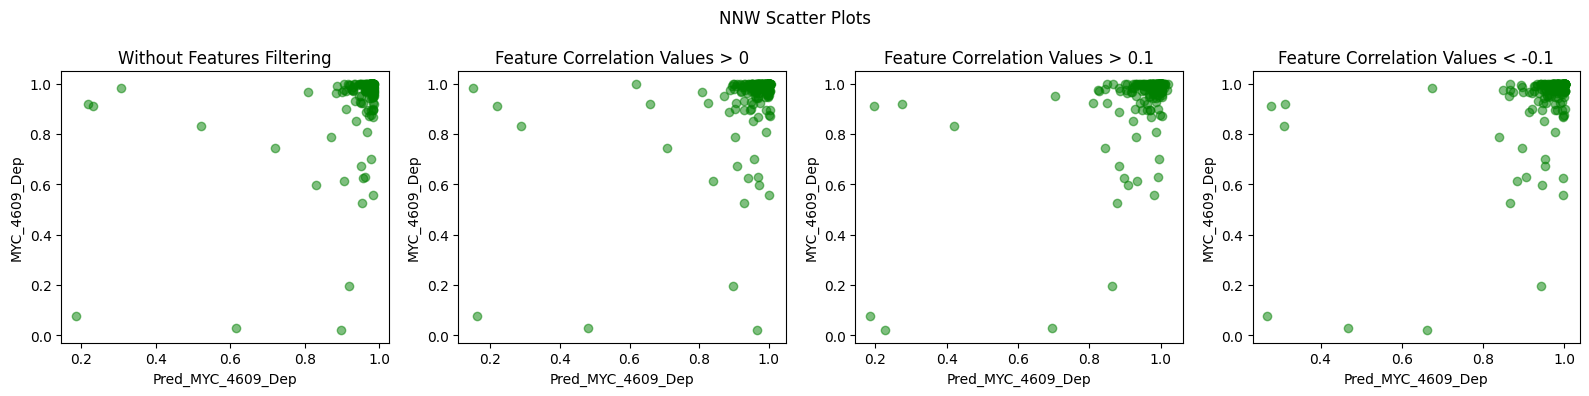

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_filtered_arranged_table.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_gt_00.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_gt_01.csv',
    '/content/drive/MyDrive/Colab Notebooks/correlation_table_filter_all/NNW_MYC_ng_01.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
fig.suptitle('NNW Scatter Plots')

# Create scatter plots
titles = ['Without Features Filtering', 'Feature Correlation Values > 0', 'Feature Correlation Values > 0.1',
          'Feature Correlation Values < -0.1']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_MYC_4609_Dep'], df['MYC_4609_Dep'], c='green',alpha=0.5)
    ax.set_xlabel('Pred_MYC_4609_Dep')
    ax.set_ylabel('MYC_4609_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
